# 2種類の正規分布から2クラス分の混合比率を用い乱数生成し境界線を導く

In [335]:
from numpy.random import multivariate_normal
from matplotlib import pyplot as plt
import numpy as np


def identification(X, mu1, sigma1, mu2, sigma2, pai1, pai2):
    sigma1inv = np.linalg.inv(sigma1)
    sigma2inv = np.linalg.inv(sigma2)
    
    S = sigma1inv - sigma2inv
    C = np.dot(mu2, sigma2inv) - np.dot(mu1, sigma1inv)
    F = np.dot(np.dot(mu1, sigma1inv), mu1.reshape((-1, 1))) - np.dot(np.dot(mu2, sigma2inv), mu2.reshape((-1, 1))) \
        + np.log(np.linalg.det(sigma1) / np.linalg.det(sigma2)) - 2 * np.log(pai1 / pai2)

    return np.diag(np.dot(np.dot(X.T, S), X)) + 2 * np.dot(C, X) + F

In [396]:
def make_data(all_data):
    x_min, x_max = int(all_data.min()) - 1, int(all_data.max())+1
    data_range = np.arange(x_min, x_max)
    mesh1, mesh2 = np.meshgrid(data_range, data_range)
    return np.array([mesh1.reshape((1, -1))[0], mesh2.reshape((1, -1))[0]]), mesh1, mesh2

def plot_data(ident_vector, data_range, x1, x2, mesh1_matrix, mesh2_matrix):
    ident_matrix = ident_vector.reshape(-1, data_range)
    
    plt.scatter(x1[:,0], x1[:,1])
    plt.scatter(x2[:,0], x2[:,1], c="red")
    con = plt.contour(mesh1_matrix, mesh2_matrix, ident_matrix)
    con.clabel()
    plt.show()

def run(data_num, pai1, pai2, mu1, mu2, sigma1, sigma2):
    x1_data_num = int(data_num * pai1)
    x2_data_num = int(data_num * pai2)

    x1 = multivariate_normal(mu1, sigma1, x1_data_num)
    x2 = multivariate_normal(mu2, sigma2, x2_data_num)

    X, mesh1_matrix, mesh2_matrix = make_data(np.vstack((x1, x2)))

#     Theoretical value
    theory_ident_vector = identification(X, mu1, sigma1, mu2, sigma2, pai1, pai2)
    plot_data(theory_ident_vector, len(mesh1_matrix[0]), x1, x2, mesh1_matrix, mesh2_matrix)

#     Actual measurement value
    cov1 = np.cov(x1, rowvar=0, bias=0)
    cov2 = np.cov(x2, rowvar=0, bias=0)
    mean1 = np.mean(x1, axis=0)
    mean2 = np.mean(x2, axis=0)

    actual_ident_vector2 = identification(X, mean1, cov1, mean2, cov2, pai1, pai2)
    plot_data(actual_ident_vector2, len(mesh1_matrix[0]), x1, x2, mesh1_matrix, mesh2_matrix)

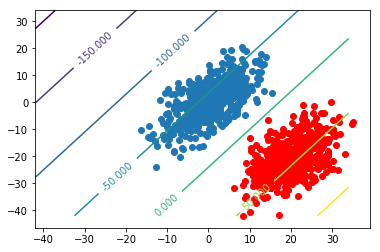

[0.35199422 0.42143313]
[ 19.9812279  -20.37324453]


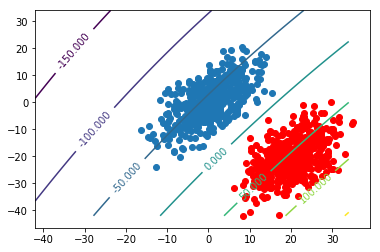

In [397]:
def main1():
    data_num = 1000 # param
    pai1 = 0.5 # param
    pai2 = 1 - pai1

    mu1 = np.array([0, 0]) # param
    sigma1 = np.array([[30, 20], [20, 50]]) # param

    mu2 = np.array([20, -20])  # param
    sigma2 = np.array([[30, 20], [20, 50]]) # param
    run(data_num, pai1, pai2, mu1, mu2, sigma1, sigma2)

main1()

focus on the data number


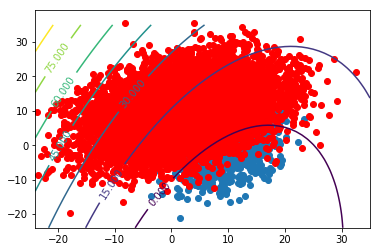

[ 9.8785115  -0.09890338]
[2.04834538 9.99225278]


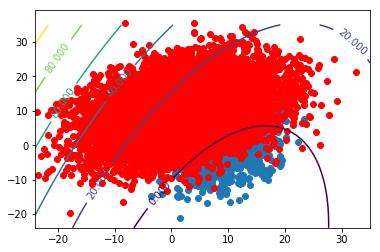

In [401]:
def main2():
    print("focus on the data number")
    data_num = 10000 # param
    pai1 = 0.1 # param
    pai2 = 1 - pai1

    mu1 = np.array([10, 0]) # param
    sigma1 = np.array([[20, 10], [10, 40]]) # param

    mu2 = np.array([2, 10])  # param
    sigma2 = np.array([[60, 20], [20, 50]]) # param
    run(data_num, pai1, pai2, mu1, mu2, sigma1, sigma2)

main2()

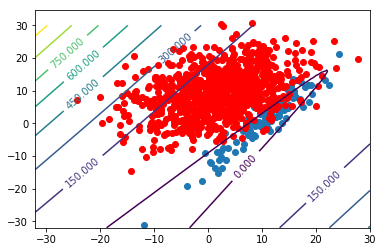

[10.4570773   0.79014393]
[1.55807983 9.59375885]


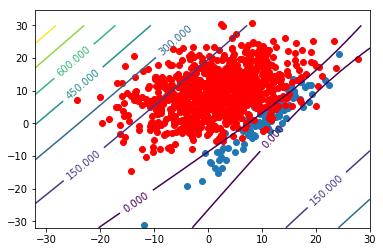

In [399]:
def main3():
    data_num = 1000 # param
    pai1 = 0.1 # param
    pai2 = 1 - pai1

    mu1 = np.array([10, 0]) # param
    sigma1 = np.array([[30, 40], [40, 60]]) # param

    mu2 = np.array([2, 10])  # param
    sigma2 = np.array([[60, 20], [20, 50]]) # param
    run(data_num, pai1, pai2, mu1, mu2, sigma1, sigma2)

main3()